# Simple linear regression 

In this exercise you will train a linear regression model via gradient descent in the simplest scenario, i.e. recreating an affine function.

The setup is as follows:
* we are given a set of pairs $(x, y)$, where $x$ represents the feature, and $y$ is the target,
* our hypothesis is $h(x) = ax + b$,
* we will use the dataset consisting of set of pairs to figure out the right values for $a$ and $b$,
* to do so we will optimize the loss function: $J(a,b) = \frac{1}{n}\sum_{i=1}^n (y_i - h(x_i))^2$,
* with the loss function in hand we can improve our guesses iteratively:
    * $a^{t+1} = a^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial a}$,
    * $b^{t+1} = b^t - \text{step_size} \cdot \frac{\partial J(a,b)}{\partial b}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with creating the dataset.

In [1]:
%matplotlib inline

import random

_a = 0.3
_b = 0.5

f = lambda x: _a * x + _b # ground truth
g = lambda x: f(x) + random.gauss(0, 0.02) # a noisy version of f

In [8]:
n = 50 # number of examples

xs = [random.random() for _ in range(n)] # features
#На каждое значение xs применяет нашу настоящую функцию f и с шумом функцию g На выходе список предсказаний
ys = list(map(g, xs)) # targets
ts = list(map(f, xs))# we don't get to see this

Our goal is to recreate $f$. However, as reality can be harsh (and usually is) we only get to observe $g$. We observe it as a list of pairs $(x,y) \in \text{zip}(xs, ys)$.

Let's plot the data.

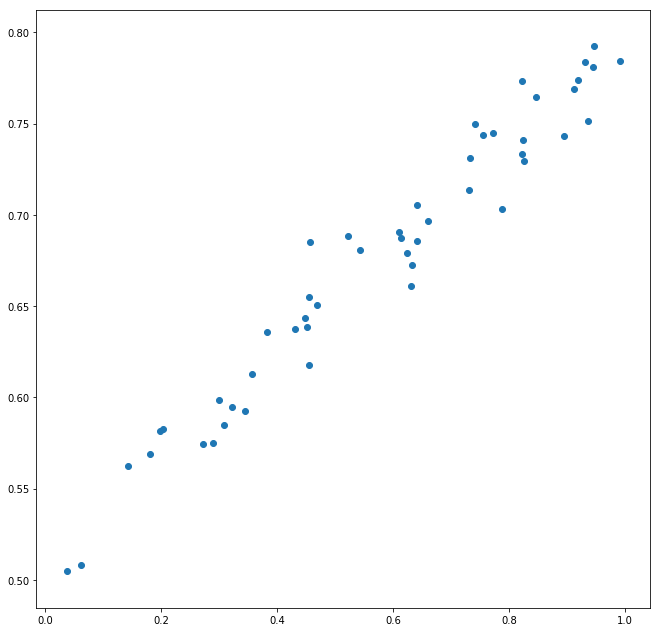

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns#Нету его

fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)

In [16]:
from statistics import mean

def l2_loss(ys, ts):
    assert len(ys) == len(ts)
    return mean([(a-b)**2 for a,b in zip(ys,ts)])

Please take a while to (roughly) guess the output before executing the cell below.

In [18]:
l2_loss(ys, ts)

0.00028587170914708333

Let's now implement the algorithm

Hint: To make sure that you correctly compute the gradients, you can compute them numerically and compare the results. 

In [20]:
a = 0. # our initial guess for _a
b = 0. # our initial guess for _b
lr = 0.5 # step size

n_epochs = 40 # number of passes over the training data

def predict(a, b, xs=xs):
    return [a * x + b for x in xs]

def evaluate(a, b, xs=xs, ys=ys):
    return l2_loss(ys, predict(a, b, xs))

losses = [evaluate(a, b)]

for i in range(n_epochs):
    
    loss = evaluate(a,b)
    
    d_a = (evaluate(a-0.001,b) - evaluate(a+0.001,b)) / 0.002
    d_b = (evaluate(a,b-0.001) - evaluate(a,b+0.001))/ 0.002
    
    a -= -d_a*lr
    b -= -d_b*lr
    
    losses.append(loss)
    
    print('Iter: {:>3} Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(i, loss, a, b))

Iter:   0 Loss: 0.46162357 a:  0.40835, b:  0.67517
Iter:   1 Loss: 0.05666209 a:  0.26442, b:  0.43986
Iter:   2 Loss: 0.00717324 a:  0.31362, b:  0.52280
Iter:   3 Loss: 0.00112405 a:  0.29536, b:  0.49445
Iter:   4 Loss: 0.00038343 a:  0.30073, b:  0.50498
Iter:   5 Loss: 0.00029167 a:  0.29789, b:  0.50188
Iter:   6 Loss: 0.00027932 a:  0.29797, b:  0.50351
Iter:   7 Loss: 0.00027679 a:  0.29708, b:  0.50347
Iter:   8 Loss: 0.00027555 a:  0.29657, b:  0.50398
Iter:   9 Loss: 0.00027457 a:  0.29597, b:  0.50428
Iter:  10 Loss: 0.00027370 a:  0.29543, b:  0.50462
Iter:  11 Loss: 0.00027291 a:  0.29492, b:  0.50493
Iter:  12 Loss: 0.00027220 a:  0.29443, b:  0.50523
Iter:  13 Loss: 0.00027157 a:  0.29396, b:  0.50551
Iter:  14 Loss: 0.00027099 a:  0.29352, b:  0.50578
Iter:  15 Loss: 0.00027047 a:  0.29310, b:  0.50603
Iter:  16 Loss: 0.00027000 a:  0.29270, b:  0.50628
Iter:  17 Loss: 0.00026958 a:  0.29232, b:  0.50651
Iter:  18 Loss: 0.00026919 a:  0.29197, b:  0.50672
Iter:  19 Lo

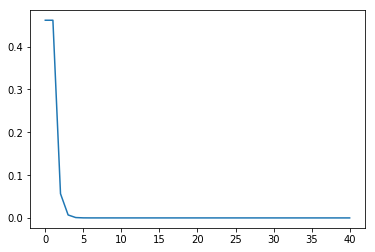

In [21]:
plt.plot(losses)

Let's now visually asses how we do on training data

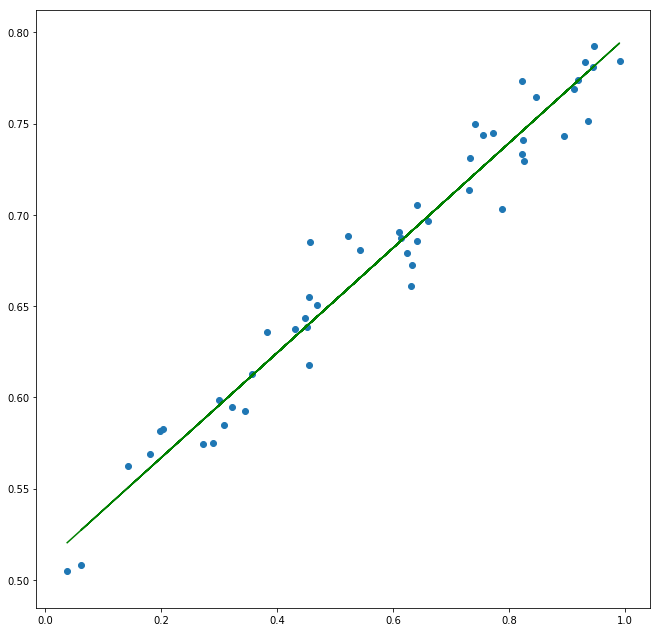

In [22]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')
plt.show()

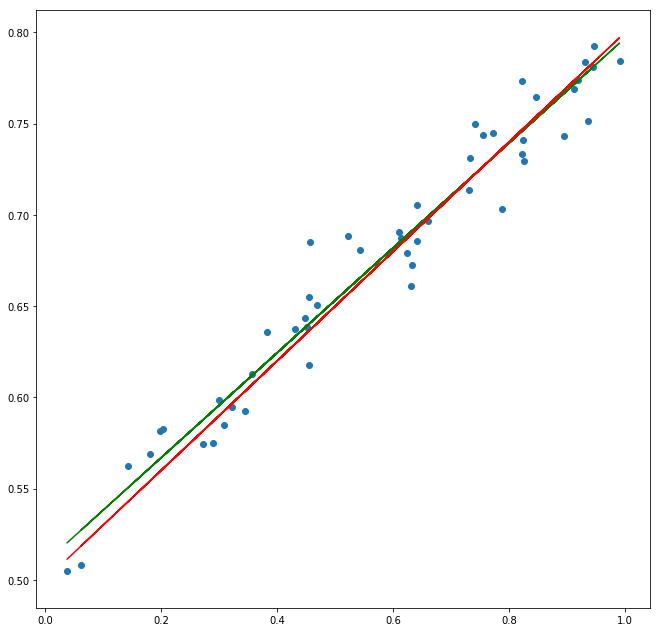

In [25]:
fig = plt.figure(figsize=(11, 11))
plt.scatter(xs, ys)
plt.plot(xs, predict(a, b), c='g')

################################################################
# TODO: Add the (unobserved) ground truth, i.e. ts to the plot #
################################################################
plt.plot(xs, ts ,c = 'r')
plt.show()

Let's check our implementation vs. the one in sklearn

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array(xs).reshape((len(xs), 1))
regr = LinearRegression()
regr.fit(X, ys) # traini

sk_a = float(regr.coef_)
sk_b = regr.intercept_
sk_loss = l2_loss(ys, regr.predict(X))

print ('Loss: {:8.8f} a: {:8.5f}, b: {:8.5f}'.format(
    sk_loss, sk_a, sk_b))

Loss: 0.00026567 a:  0.28516, b:  0.51085
